<a href="https://colab.research.google.com/github/virtualspark/NLPF/blob/main/NLPF_08_R_Jane_Austen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%load_ext rpy2.ipython

In [3]:
%%R
install.packages("janeaustenr")
install.packages("tidytext")
install.packages("widyr")
install.packages("textdata")

(as ‘lib’ is unspecified)







	‘/tmp/RtmpFAqU2d/downloaded_packages’

(as ‘lib’ is unspecified)





























	‘/tmp/RtmpFAqU2d/downloaded_packages’

(as ‘lib’ is unspecified)



















	‘/tmp/RtmpFAqU2d/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpFAqU2d/downloaded_packages’



In [14]:
%%R
library(dplyr)
library(janeaustenr)
library(tidytext)
library(tidyverse)
library(SnowballC)


✔ tibble  3.1.7     ✔ stringr 1.4.1
✔ tidyr   1.2.1     ✔ forcats 0.5.2
✔ readr   2.1.3     

✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



Let's get a book as example data again.

In [5]:
%%R
books <- austen_books()
head(books)

# A tibble: 6 × 2
  text                    book               
  <chr>                   <fct>              
1 "SENSE AND SENSIBILITY" Sense & Sensibility
2 ""                      Sense & Sensibility
3 "by Jane Austen"        Sense & Sensibility
4 ""                      Sense & Sensibility
5 "(1811)"                Sense & Sensibility
6 ""                      Sense & Sensibility


In [30]:
%%R
head(books, 10)

# A tibble: 10 × 2
   text                    book               
   <chr>                   <fct>              
 1 "SENSE AND SENSIBILITY" Sense & Sensibility
 2 ""                      Sense & Sensibility
 3 "by Jane Austen"        Sense & Sensibility
 4 ""                      Sense & Sensibility
 5 "(1811)"                Sense & Sensibility
 6 ""                      Sense & Sensibility
 7 ""                      Sense & Sensibility
 8 ""                      Sense & Sensibility
 9 ""                      Sense & Sensibility
10 "CHAPTER 1"             Sense & Sensibility


In [9]:
%%R
pride_prejudice <- books %>% filter(book == "Pride & Prejudice")

In [21]:
%%R
tail(pride_prejudice, 5)

# A tibble: 5 × 2
  text                                                                     book 
  <chr>                                                                    <fct>
1 ""                                                                       Prid…
2 "With the Gardiners, they were always on the most intimate terms."       Prid…
3 "Darcy, as well as Elizabeth, really loved them; and they were both eve… Prid…
4 "sensible of the warmest gratitude towards the persons who, by bringing" Prid…
5 "her into Derbyshire, had been the means of uniting them."               Prid…


In [11]:
%%R
dim(pride_prejudice)

[1] 13030     2


In [31]:
%%R
book <- pride_prejudice %>% mutate(linenumber = row_number(), chapter = cumsum(str_detect(text, regex("[[:digit:]]"))))
table(book$chapter)


  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19 
  6 117 108 170 116 113 267 234 247 194 279 186  70  57  28  95 120 163 360 133 
 20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39 
522 189 177 210 173 175 204 159 226 142 152 264 122 170 172 211 221 267 192 145 
 40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59 
114 164 185 249 181 507  90 129 176 285 427 232  48 211 222 215  10 311 319 187 
 60  61  62  63  64  65  66 
268 330 177 268 273 172 124 


In [35]:
%%R
head(book)

# A tibble: 6 × 4
  text                  book              linenumber chapter
  <chr>                 <fct>                  <int>   <int>
1 "PRIDE AND PREJUDICE" Pride & Prejudice          1       0
2 ""                    Pride & Prejudice          2       0
3 "By Jane Austen"      Pride & Prejudice          3       0
4 ""                    Pride & Prejudice          4       0
5 ""                    Pride & Prejudice          5       0
6 ""                    Pride & Prejudice          6       0


Tokenize.

In [36]:
%%R
tokens <- book %>% unnest_tokens(word, text)
head(tokens)

# A tibble: 6 × 4
  book              linenumber chapter word     
  <fct>                  <int>   <int> <chr>    
1 Pride & Prejudice          1       0 pride    
2 Pride & Prejudice          1       0 and      
3 Pride & Prejudice          1       0 prejudice
4 Pride & Prejudice          3       0 by       
5 Pride & Prejudice          3       0 jane     
6 Pride & Prejudice          3       0 austen   


Remove stop words.

In [38]:
%%R
install.packages("stopwords")
library(stopwords)

(as ‘lib’ is unspecified)














	‘/tmp/RtmpFAqU2d/downloaded_packages’



In [39]:
%%R
clean <- tokens %>% anti_join(get_stopwords(), by = "word")
head(clean)

# A tibble: 6 × 4
  book              linenumber chapter word     
  <fct>                  <int>   <int> <chr>    
1 Pride & Prejudice          1       0 pride    
2 Pride & Prejudice          1       0 prejudice
3 Pride & Prejudice          3       0 jane     
4 Pride & Prejudice          3       0 austen   
5 Pride & Prejudice          7       1 chapter  
6 Pride & Prejudice          7       1 1        


Stem, now that we know how to do it (and that it is sometimes helpful), in a new column.

In [40]:
%%R
stemmed <- clean %>% mutate(stem = wordStem(word))
head(stemmed)

# A tibble: 6 × 5
  book              linenumber chapter word      stem    
  <fct>                  <int>   <int> <chr>     <chr>   
1 Pride & Prejudice          1       0 pride     pride   
2 Pride & Prejudice          1       0 prejudice prejudic
3 Pride & Prejudice          3       0 jane      jane    
4 Pride & Prejudice          3       0 austen    austen  
5 Pride & Prejudice          7       1 chapter   chapter 
6 Pride & Prejudice          7       1 1         1       


Count the term frequencies.

In [41]:
%%R
counted <- stemmed %>% count(chapter, stem) 
head(counted)
dim(counted)

[1] 31181     3


We could ditch the low-frequency ones to make it a bit smaller and easier to visualize.

In [42]:
%%R
table(counted$chapter)


  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19 
  4 231 229 441 317 307 567 510 511 457 559 453 243 164 134 275 370 510 768 396 
 20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39 
983 500 435 538 495 467 502 438 551 421 434 600 374 401 401 473 563 731 558 410 
 40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59 
325 443 426 640 533 875 293 401 497 689 797 557 126 445 581 502  26 657 637 418 
 60  61  62  63  64  65  66 
553 610 474 576 554 434 391 


In [43]:
%%R
recurrent <- counted %>% filter(n > 1) # keep any stem that repeats 
dim(recurrent)
table(recurrent$chapter)
head(recurrent)

# A tibble: 6 × 3
  chapter stem        n
    <int> <chr>   <int>
1       1 _her_       2
2       1 assur       2
3       1 beauti      3
4       1 bennet      6
5       1 better      2
6       1 binglei     4


Build a document-term frequency matrix

In [44]:
%%R
install.packages("tm")
library(tm)

(as ‘lib’ is unspecified)
























	‘/tmp/RtmpFAqU2d/downloaded_packages’


Attaching package: ‘NLP’



    annotate


Attaching package: ‘tm’



    stopwords




In [45]:
%%R
tfm <- recurrent %>% cast_dtm(chapter, stem, n)
dim(tfm)

[1]   66 1509


So, this is a very basic vectorization of the stemmed tokens in the document space. We could now compute their similarity using the cosine similarity of the now-numerical vectors.

In [46]:
%%R
install.packages("qlcMatrix")
library(qlcMatrix)

(as ‘lib’ is unspecified)



















	‘/tmp/RtmpFAqU2d/downloaded_packages’


Attaching package: ‘Matrix’



    expand, pack, unpack




Attaching package: ‘qlcMatrix’



    none




In [47]:
%%R
m <-  Matrix::sparseMatrix(i = tfm$i, j = tfm$j, x = tfm$v, dims = c(tfm$nrow, tfm$ncol), dimnames = tfm$dimnames)

In [49]:
%%R
sim <- cosSparse(m) # https://rdrr.io/cran/qlcMatrix/man/cosSparse.html

It would be cool to see that, but let's not forget that this is a large sparse matrix. We could plot a smaller one, just to see.

In [50]:
%%R
smaller <- recurrent %>% filter(n > 25) %>% cast_dtm(chapter, stem, n)
dim(smaller)
sm <-  Matrix::sparseMatrix(i = smaller$i, j = smaller$j, x = smaller$v, dims = c(smaller$nrow, smaller$ncol), dimnames = smaller$dimnames)
ss <- cosSparse(sm)

In [51]:
%%R
install.packages("plot.matrix")
library(plot.matrix)

(as ‘lib’ is unspecified)







	‘/tmp/RtmpFAqU2d/downloaded_packages’



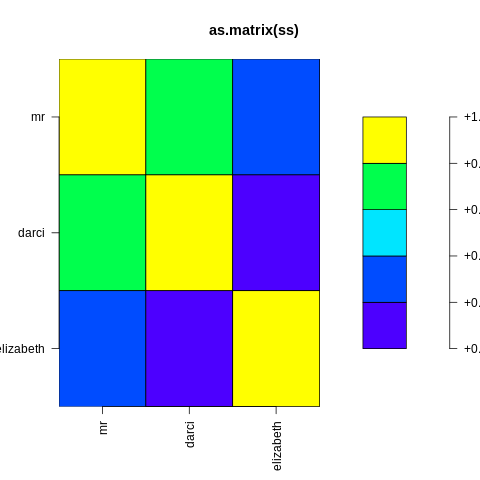

In [52]:
%%R
options(repr.plot.width = 15, repr.plot.height = 15)
par(las = 2)
# https://cran.r-project.org/web/packages/plot.matrix/vignettes/plot.matrix.html
plot(as.matrix(ss), col = topo.colors, xlab="", ylab="") # make into full matrix for drawing

We could also of course compute the tf-idf weights to get a better matrix in terms of the estimated relative importance of the words.

In [54]:
%%R
weighted <- counted %>% bind_tf_idf(stem, chapter, n)
head(weighted)

# A tibble: 6 × 6
  chapter stem         n      tf   idf  tf_idf
    <int> <chr>    <int>   <dbl> <dbl>   <dbl>
1       0 austen       1 0.25    4.20  1.05   
2       0 jane         1 0.25    0.234 0.0586 
3       0 prejudic     1 0.25    2.26  0.565  
4       0 pride        1 0.25    1.16  0.290  
5       1 _can_        1 0.00266 4.20  0.0112 
6       1 _have_       1 0.00266 3.51  0.00934


In [55]:
%%R
table(weighted$chapter)


  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19 
  4 231 229 441 317 307 567 510 511 457 559 453 243 164 134 275 370 510 768 396 
 20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39 
983 500 435 538 495 467 502 438 551 421 434 600 374 401 401 473 563 731 558 410 
 40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59 
325 443 426 640 533 875 293 401 497 689 797 557 126 445 581 502  26 657 637 418 
 60  61  62  63  64  65  66 
553 610 474 576 554 434 391 


Build the matrix.

In [56]:
%%R
install.packages("quanteda")
library(quanteda)

(as ‘lib’ is unspecified)
























	‘/tmp/RtmpFAqU2d/downloaded_packages’

Unicode version: 10.0
ICU version: 60.2



Attaching package: ‘quanteda’



    stopwords



    meta, meta<-




So, now this is sort of a vectorization of each token since we can represent it numerically in terms of its tf-idf across the corpos. So we could redo the similarity matrix in these terms. Let's filter again to get rid of the very low weights so we can visualize results.

In [57]:
%%R
bigger <- weighted %>% filter(tf_idf > 0.075)
dim(bigger)

[1] 8 6


In [58]:
%%R
tfidf <- bigger %>% cast_dfm(chapter, stem, tf_idf)
dim(tfidf)
max(tfidf)

[1] 1.051173


In [59]:
%%R
install.packages("proxy") # https://cran.r-project.org/web/packages/proxy/proxy.pdf
require(proxy) # for a dist that includes cosine similarity

(as ‘lib’ is unspecified)







	‘/tmp/RtmpFAqU2d/downloaded_packages’


Attaching package: ‘proxy’



    as.matrix



    as.dist, dist



    as.matrix




In [60]:
%%R
aux <- as.matrix(tfidf)
dim(aux)
st <- simil(t(aux), method = "cosine") # if we do not transpose, we get a document-document similarity, which is also kind of cool

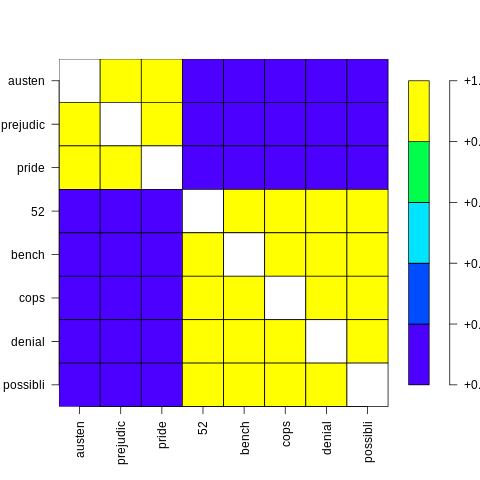

In [61]:
%%R
options(repr.plot.width = 15, repr.plot.height = 15)
par(las = 2)
plot(as.matrix(st), col = topo.colors, xlab="", ylab="", main="") 

That turned out to be a bit of binary "yes"/"no" situation.

Another option is to use the PMI which is a probabilistic way of saying whether two words appear to have a relation in terms of do they appear one after another with a higher frequency than they would if the words were ordered at random.

This implies estimating the probability of occurence of each individual word and also the probability of each bigram. Then, take the paired one, divide it by the product of the individual probabilities, and shove that into a base-two logarithm to compute the PMI.

Deepanshu Bhalla has a great tutorial that explains how to compute PMI given a document-term frequency matrix like the one we already have.

In [69]:
%%R
lines <- pride_prejudice$text
k <- length(lines)
full <- "" # making a massive string
for (i in 1:k) {
  # cleaning out the punctuation
  line = gsub('[[:punct:] ]+', ' ', lines[i])   
  if (length(line) > 0) {
    # all lower case
    full <- paste(full, tolower(line), sep = " ")
  }
}
nchar(full)

[1] 666160


In [70]:
%%R
# computing the bigram frequencies
words <- tokens(full) 
stems <- tokens_wordstem(words)
bigrams <- fcm(stems, context = "window", window = 1L, ordered = T)

What does that look like?

In [72]:
%%R
head(bigrams)

Feature co-occurrence matrix of: 6 by 3,906 features.
          features
features   pride and prejudic by jane austen chapter 1 it is
  pride        1  11        0  0    0      0       0 0  0  0
  and          6   0        1 13   20      0       0 0 42  9
  prejudic     0   0        0  1    0      0       0 0  0  0
  by           1   2        1  0    9      0       0 0  8  0
  jane         0  29        0  1    0      1       0 0  0  0
  austen       0   0        0  0    0      0       1 0  0  0
[ reached max_nfeat ... 3,896 more features ]


We need that number of words into a variable since we have to compute the PMI of each one. We might not want to really count all possible pairs, though.

In [73]:
%%R
co <- ndoc(bigrams)
co # how many words
co**2 # how many potential word pairs does that make

[1] 15256836


We also need the individual frequencies.

In [74]:
%%R
counts <- dfm(stems)
counts
total <- sum(counts)
match <- dfm_select(counts, "thus")
as.numeric(match)
length(match)
total

[1] 122880


Time to compute the PMI.

In [75]:
%%R
# based on https://www.listendata.com/2022/06/pointwise-mutual-information-pmi.html#id-099914
PMI <- data.frame(word1 = character(), word2 = character(), ppmi = double()) # put the results in a dataframe
threshold <- 0.01 # ignore anything smaller 
howmany <- 100 # just compute a few, not millions of them
for (i in 1:co) { # each co-occuring word
  for (j in 1:co) { # against each other co-occuring word
   fragment <- convert(bigrams[i, j], to = "data.frame") # easier access albeit a bit slow
   coinfo <- fragment[2]
   cocount <- as.numeric(coinfo)
   if (is.numeric(cocount) && cocount > 0) { # only calculate if nonzero co-occurence
      jp <- cocount / total # joint probability
      if (jp > 0) {
        n1 <- fragment[1] # what was the first token
        n2 <- names(fragment)[2] # what was the second token
        w1 <- as.character(n1) # the first word itself
        w2 <- as.character(n2) # the second word itself
        f1 <- dfm_select(counts, w1) # the freq of the first token
        if (length(f1) == 1) {
          f2 <- dfm_select(counts, w2) # the freq of the second token
          if (length(f2) == 1) { # require nonzero
            p1 <- as.numeric(f1) / total # relative frequency of first token individually
            p2 <- as.numeric(f2) / total # relative frequency of second token individually 
            value <- max(0, log(jp / (p1 * p2) , 2)) # if negative, set it as zero (this is PPMI, positive PMI)
            if (value > threshold) { # interesting enough
              PMI <- rbind(PMI, data.frame(word1 = w1, word2 = w2, ppmi = value))
              if (nrow(PMI) > howmany) {
                break
              }
            }
          }
        }
      }
    }
    if (nrow(PMI) > howmany) {
      break
    }
  }
  if (nrow(PMI) > howmany) {
    break
  }
}

We can visualize this, too, of course, as a weighted graph. Just remember that we did not compute all of them (in order to save time).

In [76]:
%%R
install.packages("igraph") # installed in S4
install.packages("ggraph") # installed in S4
library(igraph) # load always
library(ggraph) # load

(as ‘lib’ is unspecified)







	‘/tmp/RtmpFAqU2d/downloaded_packages’

(as ‘lib’ is unspecified)






















































	‘/tmp/RtmpFAqU2d/downloaded_packages’

Attaching package: ‘igraph’



    compose, simplify



    crossing



    as_data_frame



    as_data_frame, groups, union



    decompose, spectrum



    union




In [77]:
%%R
head(PMI)

  word1 word2     ppmi
1 pride pride 5.677471
2 pride   and 2.943855
3 pride    in 1.415664
4 pride    of 0.473998
5 pride  must 3.025394
6 pride    or 3.068179


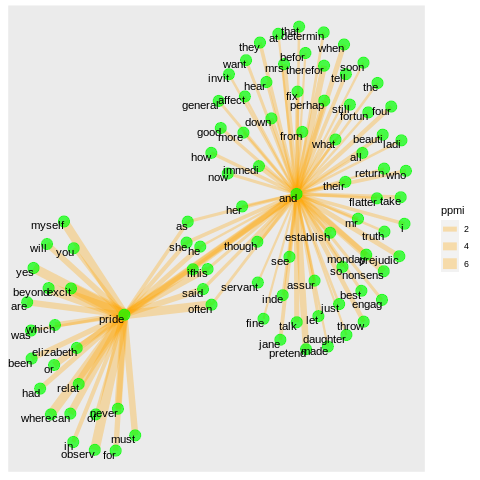

In [78]:
%%R
g <- graph_from_data_frame(PMI)
library(repr)
options(repr.plot.width = 20, repr.plot.height = 20) 
ggraph(g, layout = "fr") + # spring-force
  geom_edge_link(alpha = 0.3, aes(width = ppmi), color = "orange") + # edges
  geom_node_point(alpha = 0.7, color = "green", size = 5) +  # vertices
  geom_node_text(aes(label = name), vjust = 1, hjust = 1, size = 4) # labels

The way in which transformer models tend to represent text is with word embeddings like word2vec. Of course there is an R package for that.

In [79]:
%%R
install.packages("word2vec") # https://cran.r-project.org/web/packages/word2vec/word2vec.pdf
library(word2vec)

(as ‘lib’ is unspecified)














	‘/tmp/RtmpFAqU2d/downloaded_packages’



The beauty of these is that we can work in a lower-dimensional space whereas the tf-idf vectors to represent documents are as long as the number of terms in the corpus and those for the terms are as long as the number of documents in the corpus. The computations behind this idea are based on "sliding windows" of consequtive words within text.

In [81]:
%%R
head(pride_prejudice$text, 10) # the lines of the book can be input here
target <- 30 # what dimensionality are we willing to deal with
model <- word2vec(x = pride_prejudice$text, type = "skip-gram", dim = target, stopwords = stopwords())

We can use the model built to gain access to the calculated embeddings. Note that we could again use cosine similarity between these vectors as well.

In [82]:
%%R
emb <- as.matrix(model)
dim(emb)
emb[c("thus"), ] # getting the row of corresponding to a specific word

 [1]  0.29731005  0.26292700  0.28462753 -2.31828499  0.55634832 -0.91600120
 [7]  0.42481390  0.76667440 -0.21862130 -1.76802075  1.82955837  2.31889200
[13] -0.37547362  0.73955941  0.07162573 -0.52926522 -1.33440113  1.44403625
[19]  0.27020964  0.96683288  0.57359630 -0.03950854  0.80381423 -0.59886611
[25]  0.95130730  0.57253444  1.17609286 -0.70568413 -0.32915789 -0.40923655


Let's make a three-dimensional mapping so we can draw it.

In [84]:
%%R
m3d <- word2vec(x = pride_prejudice$text, type = "skip-gram", dim = 3, stopwords = stopwords()) 
e3d <- as.matrix(m3d)

In [85]:
%%R
install.packages("plot3D")
library(plot3D)

(as ‘lib’ is unspecified)














	‘/tmp/RtmpFAqU2d/downloaded_packages’



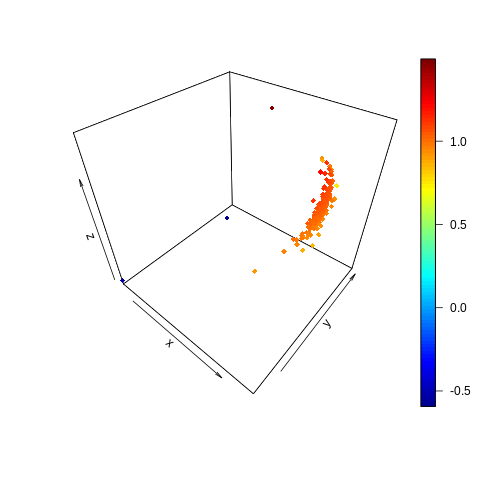

In [86]:
%%R
head(e3d)
head(e3d[, 1])
scatter3D(e3d[, 1], e3d[, 2], e3d[, 3], pch = 18)

Nice, but what words are those? Especially the ones grouped down on the xy-plane.

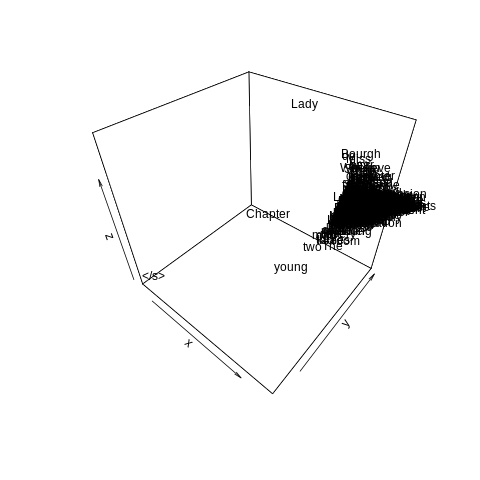

In [87]:
%%R
text3D(e3d[, 1], e3d[, 2], e3d[, 3], labels = rownames(e3d))

Heh, we had not removed digits from content so those are evidently different from other words. There is also something that looks like an HTML tag there. Note that we can now cluster the words in the vector space we have built.

In [88]:
%%R
library(stats)
clusters <- kmeans(e3d, centers = 10, iter.max = 30, algorithm = "Hartigan-Wong")

What do we have here?

In [89]:
%%R
summary(clusters)
head(clusters)

$cluster
        venture           hasty        relating       deficient          deeply 
             10              10               4               4               4 
     honourable       apologise        ridicule          solemn     impatiently 
             10              10               4               4               8 
         repeat         visible        pointing        unfolded         possess 
              4               4               4               4               4 
    distinction         defects       restraint         provoke        conclude 
              4               4              10               4              10 
       alacrity         similar       prejudice            shut      punishment 
             10               4              10               4               4 
       lodgings    presentation            nice       imaginary             owe 
              4               4               4               4              10 
     likelihood    

Yeah, but what are the clusters like?

In [90]:
%%R
install.packages("NbClust") # https://rdrr.io/cran/NbClust/

(as ‘lib’ is unspecified)







	‘/tmp/RtmpFAqU2d/downloaded_packages’



In [ ]:
%%R
install.packages("factoextra") # https://www.rdocumentation.org/packages/factoextra/versions/1.0.7

(as ‘lib’ is unspecified)

























































































































































































In [ ]:
%%R
library(NbClust)
library(factoextra)
nbc = kmeans(e3d, 5)
fviz_cluster(nbc, data = e3d, geom = c("text"), ellipse.type = "euclid")